# Linear Regression with one feature

Predicting using a dataset with happiness data

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [36]:
data=pd.read_csv("happy.csv")

## Getting familiar with the data

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

We notice that there are not missing values

## Visualizing the correlation of the data

We use a heatmap

/tmp/ipykernel_6656/3964116877.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot=True)


<AxesSubplot: >

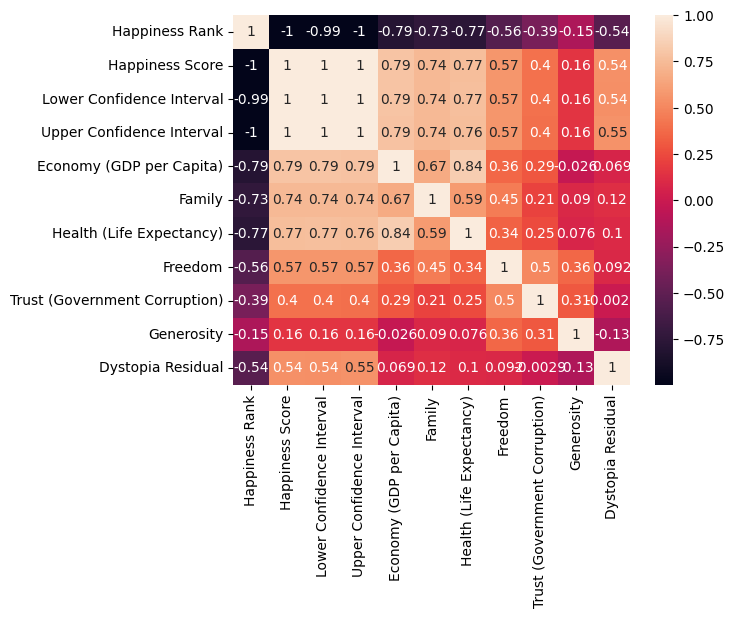

In [3]:
sns.heatmap(data=data.corr(), annot=True)

There are many linear relations, we choose just one because we want to do a **Linear regression with one feature**

Choosing
* $X$= `Health (Life Expectancy)`
* $Y$= `Happiness Score`


## Visualizing the desired columns 

These columns are going to be used to make predictions

<AxesSubplot: xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

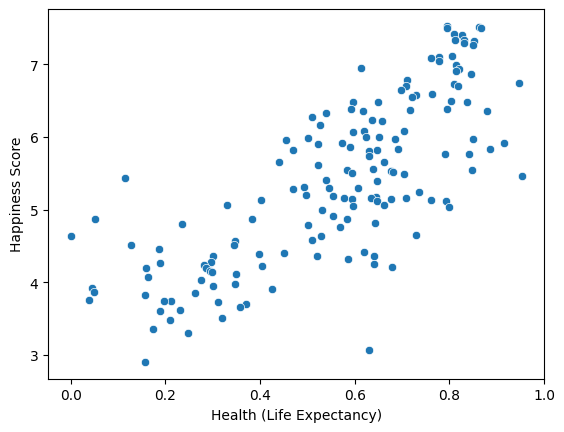

In [4]:
sns.scatterplot(data=data,x="Health (Life Expectancy)", y="Happiness Score")

There is a linear behaviour, our model will be 

$$
f({x}_{1})={\theta}_{0}+{\theta}_{1}*{x}_{1}
$$

Where ${x}_{1}$ is *Health (Life Expectancy)*

## Declaring the target and features

**Targets** $y$

In [5]:
y=data["Happiness Score"]
y.head()

0    7.526
1    7.509
2    7.501
3    7.498
4    7.413
Name: Happiness Score, dtype: float64

**Features** $X$

In [7]:
feat=["Health (Life Expectancy)"]
X=data[feat]
X.head()

,Health (Life Expectancy)
0,0.79504
1,0.86303
2,0.86733
3,0.79579
4,0.81091


## Splitting the data

Importing the library

In [10]:
from sklearn.model_selection import train_test_split

Splitting the data

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

## Predicting

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()

In [24]:
fit=model.fit(X_train,y_train)

Getting the values ${\theta}_{0}$ and ${\theta}_{1}$

${\theta}_{0}$

In [15]:
model.intercept_

3.29408223568505

${\theta}_{1}$

In [49]:
model.coef_

array([3.78147205])

In [38]:
predictions=model.predict(X_test)

# Some visualizations

Here we use the splitted data and the model that fits the best the data

### Using the *train* data

1. We plot the data `X_test` and `y_test` in a scatterplot to visualize how it behaves
2. Plot the data `X_test` and `predictions` to visualize how well it fits the data

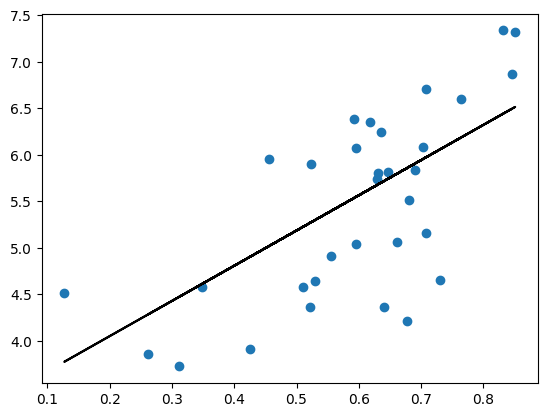

In [42]:
plt.scatter(X_test , y_test)
plt.plot(X_test , predictions, color ='black')

We notice it has a good fit, let's check the error

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
print("Loss:", mean_squared_error(y_test, predictions))

Loss: 0.5513599863520149


## Analysis

We obtained the model

$$
f({x}_{1})=3.3+3.8{x}_{1}
$$

Wich fits the data with a *mean squared error* of $0.5$